In [24]:
# Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
# !pip install yfinance
import yfinance as yf
from datetime import date
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [71]:
# Load the data
# Insert Stock data
start_date = datetime.now() - relativedelta(days=31) # Get date 31 days ago from today
end_date = date.today()

# Create empty dataframe
stock_df = pd.DataFrame()

# Download Stock Price Data
stock = []
# stock = yf.download(tickers = "AAPL MSFT AMZN TSLA NVDA GOOG GOOGL FB ASML AVGO", start=start_date, end=end_date)
ticker = "TSLA"
stock = yf.download(ticker, start=start_date, end=end_date)
stock_df = stock_df.append(stock, sort=False)
# Add stock symbol column
stock_df['Symbol'] = ticker

stock_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2022-03-07,856.299988,866.140015,804.570007,804.580017,804.580017,24164700,TSLA
2022-03-08,795.530029,849.989990,782.169983,824.400024,824.400024,26799700,TSLA
2022-03-09,839.479980,860.559998,832.010010,858.969971,858.969971,19728000,TSLA
2022-03-10,851.450012,854.450012,810.359985,838.299988,838.299988,19549500,TSLA
2022-03-11,840.200012,843.799988,793.770020,795.349976,795.349976,22272800,TSLA
2022-03-14,780.609985,800.700012,756.039978,766.369995,766.369995,23717400,TSLA
2022-03-15,775.270020,805.570007,756.570007,801.890015,801.890015,22280400,TSLA
2022-03-16,809.000000,842.000000,802.260010,840.229980,840.229980,28009600,TSLA
2022-03-17,830.989990,875.000000,825.719971,871.599976,871.599976,22194300,TSLA


In [26]:
# # Get only Adjusted Close price
# stock_df = stock_df['Adj Close']
# # Print new data
# print(stock_df.head())

Date
2017-04-07    60.507999
2017-04-10    62.478001
2017-04-11    61.742001
2017-04-12    59.368000
2017-04-13    60.799999
Name: Adj Close, dtype: float64


In [72]:
# Show and store last row of data
actual_price = stock_df.tail(1)
# Show the data
actual_price

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2022-04-06,1073.469971,1079.0,1027.699951,1045.76001,1045.76001,29710800,TSLA


In [73]:
# Get all of the data except the last row
df = stock_df.head(len(stock_df)-1)
# Show the data
df

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2022-03-07,856.299988,866.140015,804.570007,804.580017,804.580017,24164700,TSLA
2022-03-08,795.530029,849.989990,782.169983,824.400024,824.400024,26799700,TSLA
2022-03-09,839.479980,860.559998,832.010010,858.969971,858.969971,19728000,TSLA
2022-03-10,851.450012,854.450012,810.359985,838.299988,838.299988,19549500,TSLA
2022-03-11,840.200012,843.799988,793.770020,795.349976,795.349976,22272800,TSLA
2022-03-14,780.609985,800.700012,756.039978,766.369995,766.369995,23717400,TSLA
2022-03-15,775.270020,805.570007,756.570007,801.890015,801.890015,22280400,TSLA
2022-03-16,809.000000,842.000000,802.260010,840.229980,840.229980,28009600,TSLA
2022-03-17,830.989990,875.000000,825.719971,871.599976,871.599976,22194300,TSLA


In [74]:
# Create empty lists to store the independent data and dependent data
tempdays = list() # tempdays required for adding unique day values into days list
days = list()
adj_close_prices = list()

In [75]:
# Get only the date and the adjusted close prices
df_days = df.index
df_adj_close = df.loc[:, 'Adj Close']

In [76]:
df_days

DatetimeIndex(['2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-04', '2022-04-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [77]:
df_adj_close

Date
2022-03-07     804.580017
2022-03-08     824.400024
2022-03-09     858.969971
2022-03-10     838.299988
2022-03-11     795.349976
2022-03-14     766.369995
2022-03-15     801.890015
2022-03-16     840.229980
2022-03-17     871.599976
2022-03-18     905.390015
2022-03-21     921.159973
2022-03-22     993.979980
2022-03-23     999.109985
2022-03-24    1013.919983
2022-03-25    1010.640015
2022-03-28    1091.839966
2022-03-29    1099.569946
2022-03-30    1093.989990
2022-03-31    1077.599976
2022-04-01    1084.589966
2022-04-04    1145.449951
2022-04-05    1091.260010
Name: Adj Close, dtype: float64

In [78]:
# Create the independent data set (dates)
for day in df_days:
  day = day.strftime("%d") # Converting datetime/timestamp day to string
  tempdays.append([int(day)]) # Appending int day to tempdays list

# Appending day to days list
for day in tempdays:
  if day not in days: # Checks if day in tempdays is not in days list
    days.append(day) # If day in tempdays is not present in days list, append to days list to generate list with day unique values

# Create the dependent data set (adj close prices)
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [79]:
# Display days
days

[[7],
 [8],
 [9],
 [10],
 [11],
 [14],
 [15],
 [16],
 [17],
 [18],
 [21],
 [22],
 [23],
 [24],
 [25],
 [28],
 [29],
 [30],
 [31],
 [1],
 [4],
 [5]]

In [80]:
# Display adj close prices
adj_close_prices

[804.5800170898438,
 824.4000244140625,
 858.969970703125,
 838.2999877929688,
 795.3499755859375,
 766.3699951171875,
 801.8900146484375,
 840.22998046875,
 871.5999755859375,
 905.3900146484375,
 921.1599731445312,
 993.97998046875,
 999.1099853515625,
 1013.9199829101562,
 1010.6400146484375,
 1091.8399658203125,
 1099.5699462890625,
 1093.989990234375,
 1077.5999755859375,
 1084.5899658203125,
 1145.449951171875,
 1091.260009765625]

In [82]:
# Creating 3 models
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(tempdays, adj_close_prices)

poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(tempdays, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.85)
rbf_svr.fit(tempdays, adj_close_prices)

SVR(C=1000.0, gamma=0.85)

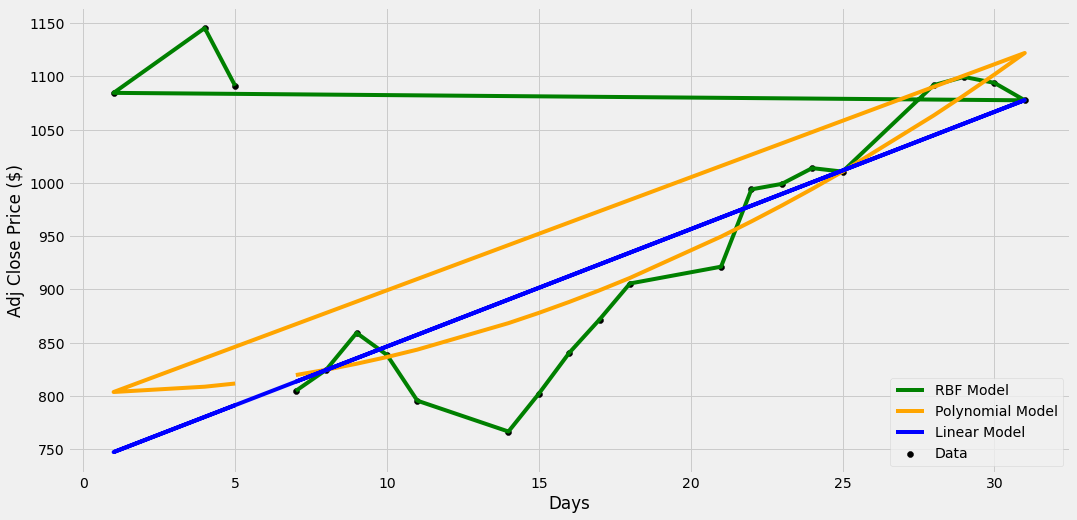

In [83]:
# Plot the models
plt.figure(figsize=(16,8))
plt.scatter(tempdays, adj_close_prices, color='black', label='Data')
plt.plot(tempdays, rbf_svr.predict(tempdays), color='green', label='RBF Model')
plt.plot(tempdays, poly_svr.predict(tempdays), color='orange', label='Polynomial Model')
plt.plot(tempdays, lin_svr.predict(tempdays), color='blue', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()

In [98]:
# Show predicted price for given day
yesterday_date = date.today() - relativedelta(days=1)
yesterday_date = yesterday_date.strftime("%d")
day = [[yesterday_date]]
print(day)
print('The RBF SVR predicted price:', rbf_svr.predict(day))
print('The Linear SVR predicted price:', lin_svr.predict(day))
print('The Polynomial SVR predicted price:', poly_svr.predict(day))
print('The actual price:', actual_price['Adj Close'])

[['06']]
The RBF SVR predicted price: [934.79499909]
The Linear SVR predicted price: [802.26524605]
The Polynomial SVR predicted price: [815.21406883]
The actual price: Date
2022-04-06    1045.76001
Name: Adj Close, dtype: float64
